# Assignment III - Exploring Transformer models

## 1. Setting up the Environment:
- All relevant libraries are in the requirements.txt
- Downloaded the `openai-community/gpt2` model from Hugging Face
    - Using the `tokenizer` and `model` instead of the `pipeline` from hugging face 

In [62]:
# Load model directly
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

## 2. Understanding the GPT-2 Model:
(Use of ChatGPT was used here for Research Purposes and better understanding of the processes invoved with GPT-2 by OpenAI)

Useful "Technical" Links:

[Improving Language Understanding by Generative Pre-Training](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)

[Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

### Investigation of the architecture of the GPT-2 model

- Type: Decoder-Only Model
    
    - Components: 
        1. Token and Positional Embeddings
        2. Transformer Decoder Blocks
    - Layers:
        1. Input and Embeddings
            - Token Embedding Layer
            - Positional Embedding
        2. Transformer Decoder Blocks (Repeated depending on the model)
            - Layer Normalization
            - Masked Multi-Head Self-Attention
            - QKV Projections
            - Scaled Dot-Product Self Attention
            - Output Projection
            - Residual Connection (Post Attention)
            - Layer Normalization 
            - Feed-Forward Network
                - First Linear Layer
                - Activation
                - Second Linear Layer
            - Residual Connection 
        3. Final Layer
            - Layer Normalization
            - Output Linear Layer (Projects the Vocabulary Logits)
    - Hyper Parameters:
        1. n_layers: Number of Transformer Blocks
        2. n_heads: Number of Attention Heads in Each Layer
        3. n_embd: Hidden Dimension Size
        4. attn_mask: Casual Mask
        5. Vocab_size: Number of tokens that can be generated

### Apart from the GPT model, the Hugging Face Transformers library has other model architectures such as BERT, BART or T5, how do the model architectures differ? 

| Model | Architecture Type | Uses/Purpose | Advantages | Disadvantages |
|-|-|-|-|-|
| GPT-2| Decoder | Generation | Good at Pure Generation + Simple and Efficient | No Bidirectional Encoding which leads to weaker understanding | 
| BERT | Encoder | Understanding and Classification |Best for classification and its creation of embeddings | Bad at Generation of text | 
| BART | Encoder-Decoder | Generation + Understanding | Strong for summarization and combines the understanding from BERT, and the generation of GPT-2 | More Computationally Heavy than the previous models | 

## 3. Generating Data through Diverse Strategies + 4. Analysis and evaluation:
- Using the **_Hugging Face Documentation_** we can see that we will be using some of the following parameters to experiment with the desired outputs:
    - `Temperature` control: *Experiment with different temperature values to control the randomness of generated text.*
    - `Top-k` sampling: *Generate text by selecting from the top-k most likely tokens.*
    - `Top-p` sampling (nucleus sampling): *Generate text by selecting from the top-p (nucleus) probability distribution.*
 
- [Link to the Documentation](https://huggingface.co/docs/transformers/en/main_classes/text_generation)

### Prompt
- We will use the defaults of all of the above mentioned parameters to observe the differences in observed outputs from GPT-2
- Here I made a quick helper function to help me better manipulate the parameters and loop through potential outputs. 

In [22]:
prompt = "Sebastian is"
encoded_prompt = tokenizer(prompt, return_tensors="pt")

# Helper Function to Run Generation
def runGPT(num_output:int = 10, max_length:int = 15, temperature: float = 1.0, top_k: int = 50, top_p: float = 1.0):
    # Generating the results with default values in each parameter
    for i in range(num_output):
        # Generate text using the model
        output_sequences = model.generate(
            attention_mask=encoded_prompt["attention_mask"],    # This part of the allows for the use of the attention mask with helps the model prioritize certain parts of the generated text, and is most beneficial when applying it alongside padding)
            pad_token_id=tokenizer.eos_token_id,                # The id of the <pad> tokens (which helps GPT-2 recognize which tokens are special tokens)
            input_ids=encoded_prompt["input_ids"],              # The text used in the prompt for generation 
            max_length=max_length,                              # Maximum length of the generated text
            temperature=temperature,                            # Using the default of 1.0: Controls the randomness of the text (the distribution do_sample takes from higher = more diverse outputs, lower = more deterministic)
            top_k=top_k,                                        # Using the default of 50
            top_p=top_p,                                        # Using the default of 1.0
            do_sample=True,                                     # Enables the model to randomly from a given distribution, other than just taking from the most likely output (creative vs deterministic outputs) 
        )

        generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
        print(generated_text) # Printing the Generated Text

### Default Prompt Results

In [23]:
# Default Prompt Results

runGPT(num_output=5, max_length=25)

Sebastian is also on track to secure the fifth consecutive World Cup, and says there are plans to expand into South
Sebastian is already showing him his own form under the tutelage of Michael Jackson. But the other big stars
Sebastian is an absolute hero, not only in our country, but in the world of business and politics as well
Sebastian is a player that is trying to keep pace with everyone else in Barcelona. It is one of the things
Sebastian is one of the most highly rated players we have seen. He is playing extremely well. I would certainly


#### `Baseline (Default Arguments): temperature=1.0, top_k=50, top_p=1.0`

##### Analysis:
There is understandable and *grammatically* correct sentences
Consistent thoughts througout the sentence, where we can see the following example has text in the beginning and end that relates to itself: 
- `Sebastian is one of the most highly rated players we have seen. He is playing extremely well. I would certainly` 

Doesn't deviate too much from the idea aof a "person", and recognizes Sebastian as a *central part* of the text it generates.

##### Strengths
- Meant to be the benchmark, and as expected has a good balance
- Outputs are potentially usable for some applications 
- No obvious errors here and is just generic

##### Weaknesses
- Very normal and could potentially result in '*limited*' creativity 
- Some repetitive patterns in style (“Sebastian is [role] who…”), instead of using the text to generate things such as ("The world champion *Sebastian is* from Brazil")

### Temperature Control
- The value used to module the next token probabilities

In [8]:
# Temperature Control

runGPT(num_output=5, max_length=25, temperature=2.0)

Sebastian is toying himself just not in that role where he often loses it." It was clear with how long
Sebastian is always very interesting!" – Paul McCartney
Letting down as he goes on, he will look even
Sebastian is working again to bring about a resolution in case other issues continue during our scheduled workshop as outlined previously in
Sebastian is to some very poor, vulnerable and sometimes dead victims. The world faces an increasingly existential human threat --
Sebastian is a real strength here. With their 4.50 average rating through his third year on Toronto shores where


#### `High Temperature (Default at 1.0): temperature=2.0`

##### Analysis:
Erratic and Creative Outputs from the model
Mostly grammatically correct, however at times there are: 
- Broken and unclear relationships between some of the code generated for example:
    - `Sebastian is to some very poor, vulnerable and sometimes dead victims. The world faces an increasingly existential human threat --`
- Some phrases feel bizarre or off (“toying himself”, “sometimes dead victims”)

##### Strengths
- Higher diversity of outputs and more *creative* than the default parameters
- Is generating unusual and unexpected ideas compared to the default

##### Weaknesses
- Significantly less choerent/reliable
- Worse phrasing of generated text/unclear text 
- Results in less *usable* outputs

### Top-K Sampling
- The number of highest probability vocabulary tokens to keep for top-k-filtering

In [10]:
# Top-K Sampling

runGPT(num_output=5, max_length=25, top_k=100)

Sebastian is already considering a comeback. Many believe there's another, more promising player, in the Brazilian midfielder.
Sebastian is a member of the Hildegardner family. Sebastian was born to John and
Sebastian is an American, British, Israeli and Palestinian who lives in a small village of about 150 people southeast of
Sebastian is one of our biggest personalities, he spends a lot of time with his girls, and at times even
Sebastian is so far down the other side of the spectrum that as the man has continued to come out of his


##### `High Top-K (Default at 50): top_k=100`

Analysis:
- Valid generated text that doesnt go to far like the temperature parameter
- A bit more variety and weirdness in facts (e.g., four nationalities, odd biography)
- Sentences remain quite readable although some of them are a bit generic as well

Strengths
- More lexical and conceptual diversity than the default parameter 
- Preserves overall coherence better than temperature=2.0

Weaknesses
- Sometimes drifts into implausible "hard to believe" details such as the implausability of one person being:
    - `an American, British, Israeli and Palestinian`
- Slight increase in “hallucinated” weirdness creating an "improbable" backgrounds

### Top-P Sampling (Between 0 - 1 : Default at 1.0)
- Only the smallest set of most probable tokens with probabilities that add up to top_p or higher are kept for generation


In [18]:
# Top-P Sampling

runGPT(num_output=5, max_length=25, top_p= 0.50)

Sebastian is a very smart guy, and he knows what he's doing. He knows how to win, and
Sebastian is a member of the "Greater Than Nothing" group, a group that seeks to develop a global
Sebastian is not the only one who is worried about the situation. He has also expressed his concerns about the future
Sebastian is a man who has never been to the World Cup, and he's not even a World Cup winner
Sebastian is a big fan of the original and likes to show off his latest creations. He also has a knack


#### `High Top-P (Default of 1.0): top_p=0.50 `

About Top-P: Keeps the smallest set of most probable tokens, where those probabilities add up to top_p, so the smaller it is, the more "conservative" the results will be compared to those at the tail end of the given distribution.

Analysis:
- All sentences are very coherent and grammatical as we have "cut" the tails of the distribution to generate "less likely" text.
- Outputs stay on a narrow band of plausible, but generic facts.
- Almost opposite to the `temperature=2.0` parameter with "less" creative text.

Strengths
- High coherence within the text, where every line reads almost as a believeable fact 
- Stays on topic, where *Sebastian* is the consistent character and there is no bizarre semantic drift unlike with `temperature`
- Controlled text: Seems to output more reliable outputs

Weaknesses
- Less diversity as the less probable tokens to choose from are no longer an option and therefore text will start to seem "mundane" 
- Lose of some of the creative side that was obtained with higher temperature or wider sampling (top_k=100 or top_p≈1.0)


## 5. Deep-dive into attention scores:

### Visualization

torch.Size([10, 10])
['I', 'Ġlove', 'Ġtransform', 'ers', 'Ġand', 'Ġour', 'ĠAdvanced', 'ĠAI', 'Ġclass', '!']


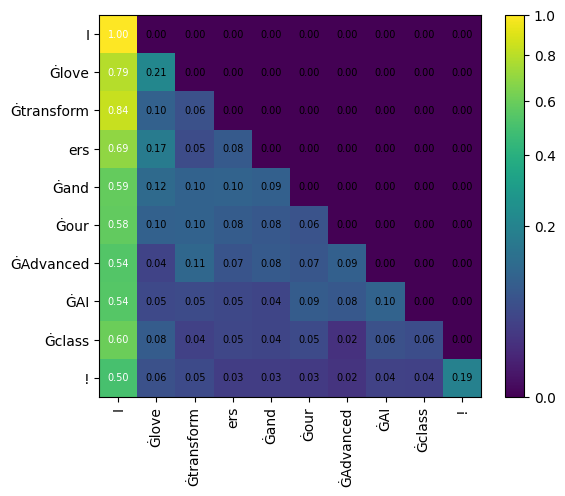

In [63]:
device = "cpu"

# IMPORTANT: force eager attention so we can get attention matrices
model = AutoModelForCausalLM.from_pretrained(
    "openai-community/gpt2",
    attn_implementation="eager",
)

model.to(device)
model.eval()

# I used a GitHub Repo as a skeleton for what I should have: https://github.com/mattneary/attention
def get_last_layer_mean_attention(text: str):
    
    # Tokenize
    encoded = tokenizer(text, return_tensors="pt").to(device)
    input_ids = encoded["input_ids"]
    attention_mask = encoded["attention_mask"]

    # Forward pass
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_attentions=True,
            return_dict=True,
        )

    attentions = outputs.attentions
    if attentions is None:
        # Part of the Repo
        raise RuntimeError(
            "attentions is None – model did not return attention. "
            "Make sure attn_implementation='eager' and output_attentions=True."
        )

    # Last layer and Average
    last_layer = attentions[-1][0]       # (num_heads, seq_len, seq_len)
    mean_heads = last_layer.mean(dim=0)  # (seq_len, seq_len)

    # Resultant Tokens
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    
    return mean_heads, tokens



# I used CHATGPT 5.1 to Generate the HEATMAP Function for Visualization
def plot_attention_heatmap(attention_matrix, tokens):
    length = len(tokens)

    # Create a custom colormap:
    # - Start at black for zero
    # - Rapidly become vibrant (blues→greens→yellows)
    cmap = plt.get_cmap("viridis")
    # Optionally adjust gamma to increase vibrance
    norm = colors.PowerNorm(gamma=0.5)  # gamma < 1 increases contrast for low values

    fig, ax = plt.subplots(figsize=(max(6, length * 0.5), max(4, length * 0.5)))
    im = ax.imshow(attention_matrix, cmap=cmap, norm=norm)

    # Token labels
    ax.set_xticks(range(length))
    ax.set_yticks(range(length))
    ax.set_xticklabels(tokens, rotation=90)
    ax.set_yticklabels(tokens)

    # Add numerical values inside cells
    max_val = attention_matrix.max()

    for i in range(length):
        for j in range(length):
            val = attention_matrix[i, j]
            text_color = "white" if val > max_val * 0.4 else "black"
            ax.text(j, i, f"{val:.2f}", ha="center", va="center", color=text_color, fontsize=7)

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    
attention_prompt = "I love transformers and our Advanced AI class!"
att_matrix, att_tokens = get_last_layer_mean_attention(attention_prompt)

print(att_matrix.shape)  # should be (seq_len, seq_len)
print(att_tokens)

plot_attention_heatmap(att_matrix, att_tokens)

### Interpretation of Attention Matrices
- The entire leftmost column has very high values, as is especially high in the "*I*" where it may seem that GPT 2 is treating the first person subject as quite important in the generation of text.
- It can also be seen that the tokens place quite a lot of value in the tokens immediately before it, for example:
    - "*love*" seems to highly value "*I*" right before it with a score of 0.79
- This is most likely due to the nature of GPT and its sequential steps, and due to the mask which prevents in seeing into future tokens, it means that the tokens place quite a lot of value in the tokens prior
- There are also interesting relationships between "related words" such as "*Advanced*" and "*AI*", where the model seems to form somewhat evident semantic relationships between the tokens.